# Notebook that clusters per depth individual days

## Importing

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_som.som import SOM
import salishsea_tools.viz_tools as sa_vi
from sklearn import preprocessing


## Datasets Preparation

In [2]:
def datasets_preparation():

   # Driver variables
    temp = ds.votemper.where(mask==1)
    saline = ds.vosaline.where(mask==1)

    # Biological variables
    sil = ds_bio.silicon.where(mask==1)
    nitr = ds_bio.nitrate.where(mask==1)
    ammo = ds_bio.ammonium.where(mask==1)

    # Phytoplankton variables
    diat = ds_bio.diatoms.where(mask==1)
    flag = ds_bio.flagellates.where(mask==1)
    
    # Zooplankton variables
    micro = ds_bio.microzooplankton.where(mask==1)
    meso = ds_bio.mesozooplankton.where(mask==1)
    
    return (temp, saline, sil, nitr, ammo, diat, flag, micro, meso )


## SOM

In [3]:
def som (inputs, m, n):

    # Pre processing     
    indx = np.where(~np.isnan(inputs).any(axis=0))
    inputs2 = inputs[:,indx[0]]
    inputs3 = preprocessing.normalize(inputs2, norm= 'max')
    inputs3 = inputs3.transpose()

    # SOM
    temp_som = SOM(m, n, dim= inputs3[0,:].size, lr = 0.1)
    temp_som.fit(inputs3, epochs = 5)
    predictions = temp_som.predict(inputs3)

    # Post processing
    unique, counts = np.unique(predictions, return_counts=True)
    indx2 = np.full(inputs[0,:].size,np.nan)
    indx2[indx[0]] = predictions
    clusters = np.reshape(indx2,(898,398)) 

    # Preparation of the dataarray 
    clusters= xr.DataArray(clusters,
        coords = {'y': temp.y, 'x': temp.x},
        dims = ['y','x'],
        attrs=dict(description="Clusters of the performed self organizing map algorithm",
        long_name ="Cluster",
        units="count"))
    
    return (clusters, unique, counts)
    

## Printing

In [4]:
def printing ():

    print('Date: ' + str(date.date[0]))
    print('Depth: ' + str(np.round(ds['deptht'][depth].values,2)) + ' meters', '\n')

    for i in unique:
        
        print('The amount of grid boxes for cluster ' + str(i), ' is ' + str(counts[i]),'\n')

        print('The minimum temperature for cluster '+ str(i), ' is ' + str(np.round(temp.where(clusters==i).min().values,2)), ' degrees_C')
        print('The maximum temperature for cluster '+ str(i), ' is ' + str(np.round(temp.where(clusters==i).max().values,2)), ' degrees_C')
        print('The mean temperature for cluster '+ str(i), ' is ' + str(np.round(temp.where(clusters==i).mean().values,2)), ' degrees_C', '\n')

        print('The minimum salinity for cluster '+ str(i), ' is ' + str(np.round(saline.where(clusters==i).min().values,2)), ' g kg-1')
        print('The maximum salinity for cluster '+ str(i), ' is ' + str(np.round(saline.where(clusters==i).max().values,2)), ' g kg-1')
        print('The mean salinity for cluster '+ str(i), ' is ' + str(np.round(saline.where(clusters==i).mean().values,2)), ' g kg-1', '\n'*2)
        
    
        print('The minimum silicon concentration for cluster '+ str(i), ' is ' + str(np.round(sil.where(clusters==i).min().values,2)), ' mmol m-3')
        print('The maximum silicon concentration for cluster '+ str(i), ' is ' + str(np.round(sil.where(clusters==i).max().values,2)), ' mmol m-3')
        print('The mean silicon concentration for cluster '+ str(i), ' is ' + str(np.round(sil.where(clusters==i).mean().values,2)), ' mmol m-3', '\n')

        print('The minimum nitrate concentration for cluster '+ str(i), ' is ' + str(np.round(nitr.where(clusters==i).min().values,2)), ' mmol m-3')
        print('The maximum nitrate concentration for cluster '+ str(i), ' is ' + str(np.round(nitr.where(clusters==i).max().values,2)), ' mmol m-3')
        print('The mean nitrate concentration for cluster '+ str(i), ' is ' + str(np.round(nitr.where(clusters==i).mean().values,2)), ' mmol m-3', '\n')

        print('The minimum ammonium concentration for cluster '+ str(i), ' is ' + str(np.round(ammo.where(clusters==i).min().values,2)), ' mmol m-3')
        print('The maximum ammonium concentration for cluster '+ str(i), ' is ' + str(np.round(ammo.where(clusters==i).max().values,2)), ' mmol m-3')
        print('The mean ammonium concentration for cluster '+ str(i), ' is ' + str(np.round(ammo.where(clusters==i).mean().values,2)), ' mmol m-3', '\n'*2)


        print('The minimum diatom concentration for cluster '+ str(i), ' is ' + str(np.round(diat.where(clusters==i).min().values,2)), ' mmol m-3')
        print('The maximum diatom concentration for cluster '+ str(i), ' is ' + str(np.round(diat.where(clusters==i).max().values,2)), ' mmol m-3')
        print('The mean diatom concentration for cluster '+ str(i), ' is ' + str(np.round(diat.where(clusters==i).mean().values,2)), ' mmol m-3', '\n')

        print('The minimum flagellate concentration for cluster '+ str(i), ' is ' + str(np.round(flag.where(clusters==i).min().values,2)), ' mmol m-3')
        print('The maximum flagellate concentration for cluster '+ str(i), ' is ' + str(np.round(flag.where(clusters==i).max().values,2)), ' mmol m-3')
        print('The mean flagellate concentration for cluster '+ str(i), ' is ' + str(np.round(flag.where(clusters==i).mean().values,2)), ' mmol m-3', '\n'*2)


        print('The minimum microzooplankton concentration for cluster '+ str(i), ' is ' + str(np.round(micro.where(clusters==i).min().values,2)), ' mmol m-3')
        print('The maximum microzooplankton concentration for cluster '+ str(i), ' is ' + str(np.round(micro.where(clusters==i).max().values,2)), ' mmol m-3')
        print('The mean microzooplankton concentration for cluster '+ str(i), ' is ' + str(np.round(micro.where(clusters==i).mean().values,2)), ' mmol m-3', '\n')

        print('The minimum mesozooplankton concentration for cluster '+ str(i), ' is ' + str(np.round(meso.where(clusters==i).min().values,2)), ' mmol m-3')
        print('The maximum mesozooplankton concentration for cluster '+ str(i), ' is ' + str(np.round(meso.where(clusters==i).max().values,2)), ' mmol m-3')
        print('The mean mesozooplankton concentration for cluster '+ str(i), ' is ' + str(np.round(meso.where(clusters==i).mean().values,2)), ' mmol m-3', '\n'*2)


## Plotting

In [5]:
def plotting (labels, titles, variables):

    fig, ax = plt.subplots(2,2, figsize=(10, 15))

    cmap = plt.get_cmap('tab20', unique.max()+1)
    cmap.set_bad('gray')
    clus = variables[0].plot(ax=ax[0,0], cmap=cmap, vmin = unique.min(), vmax = unique.max()+1, add_colorbar=False)

    cbar = fig.colorbar(clus, ticks = unique+0.5) 
    cbar.set_ticklabels(unique)
    cbar.set_label(labels[0])

    plt.subplots_adjust(left=0.1,
        bottom=0.1, 
        right=0.9, 
        top=0.95, 
        wspace=0.15, 
        hspace=0.15)
        
    cmap = plt.get_cmap('cubehelix')
    cmap.set_bad('gray')

    variables[1].plot(ax=ax[0,1], cmap=cmap, cbar_kwargs={'label': labels[1]})
    variables[2].plot(ax=ax[1,0], cmap=cmap, cbar_kwargs={'label': labels[2]})

    sa_vi.set_aspect(ax[0,0])
    sa_vi.set_aspect(ax[0,1])
    sa_vi.set_aspect(ax[1,0])

    ax[0,0].title.set_text(titles[0])
    ax[0,1].title.set_text(titles[1])
    ax[1,0].title.set_text(titles[2])

    if len(titles) == 3:

        ax[1,1].axis('off')
    
    else:

        variables[3].plot(ax=ax[1,1], cmap=cmap, cbar_kwargs={'label': labels[3]})
        sa_vi.set_aspect(ax[1,1])
        ax[1,1].title.set_text(titles[3])

    fig.suptitle(str(date.date[0]) + ', Depth: ' + str(np.round(ds['deptht'][depth].values,2)) + ' meters')


## Main Body

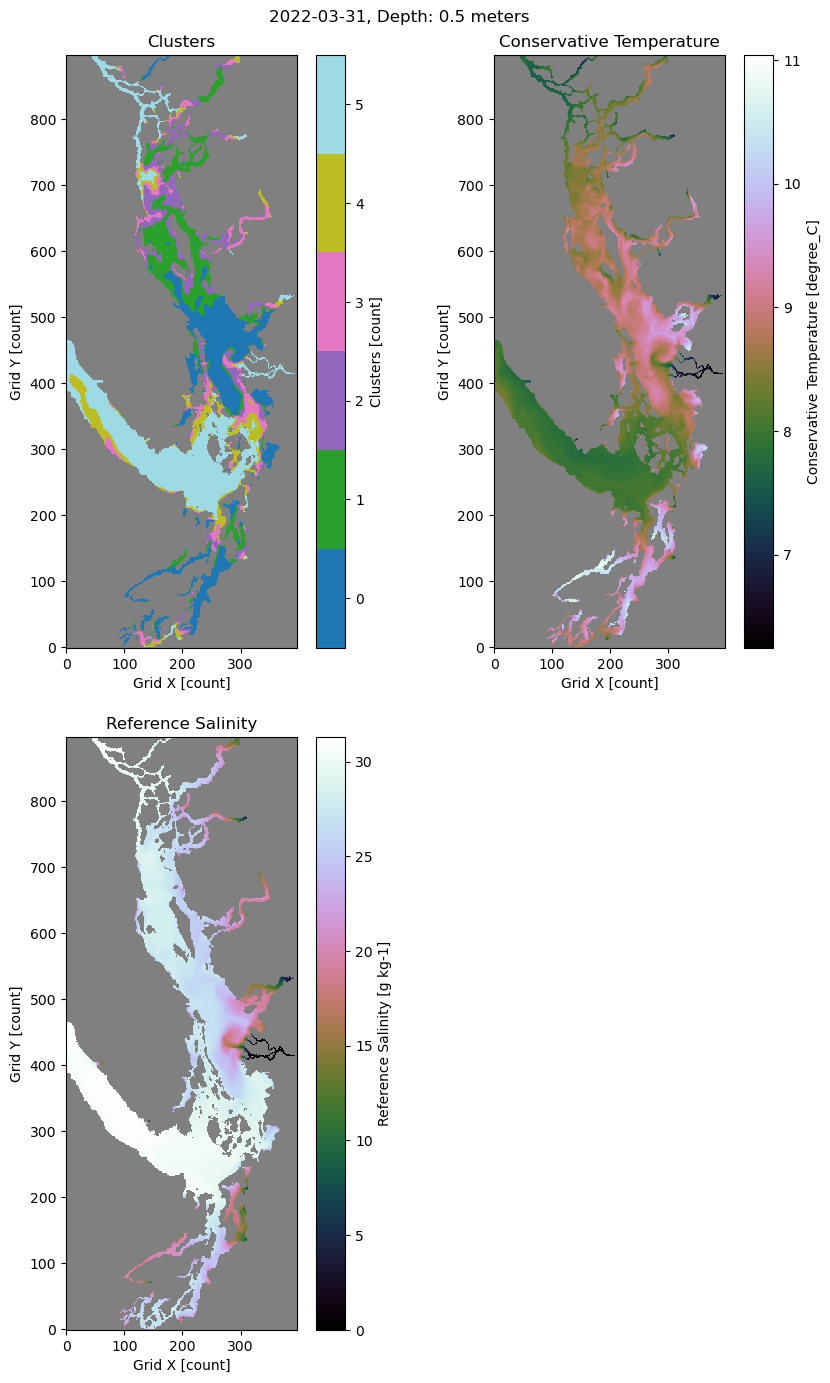

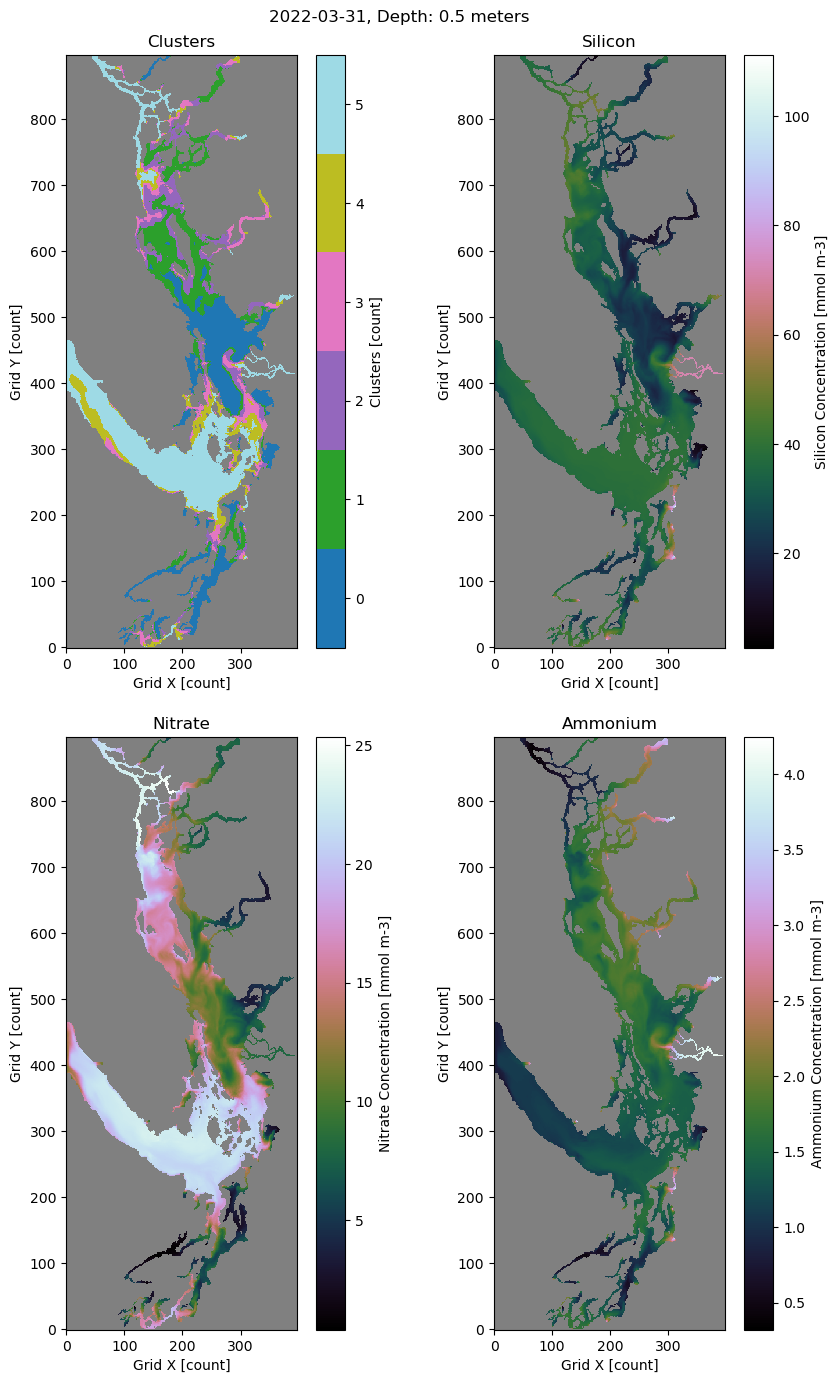

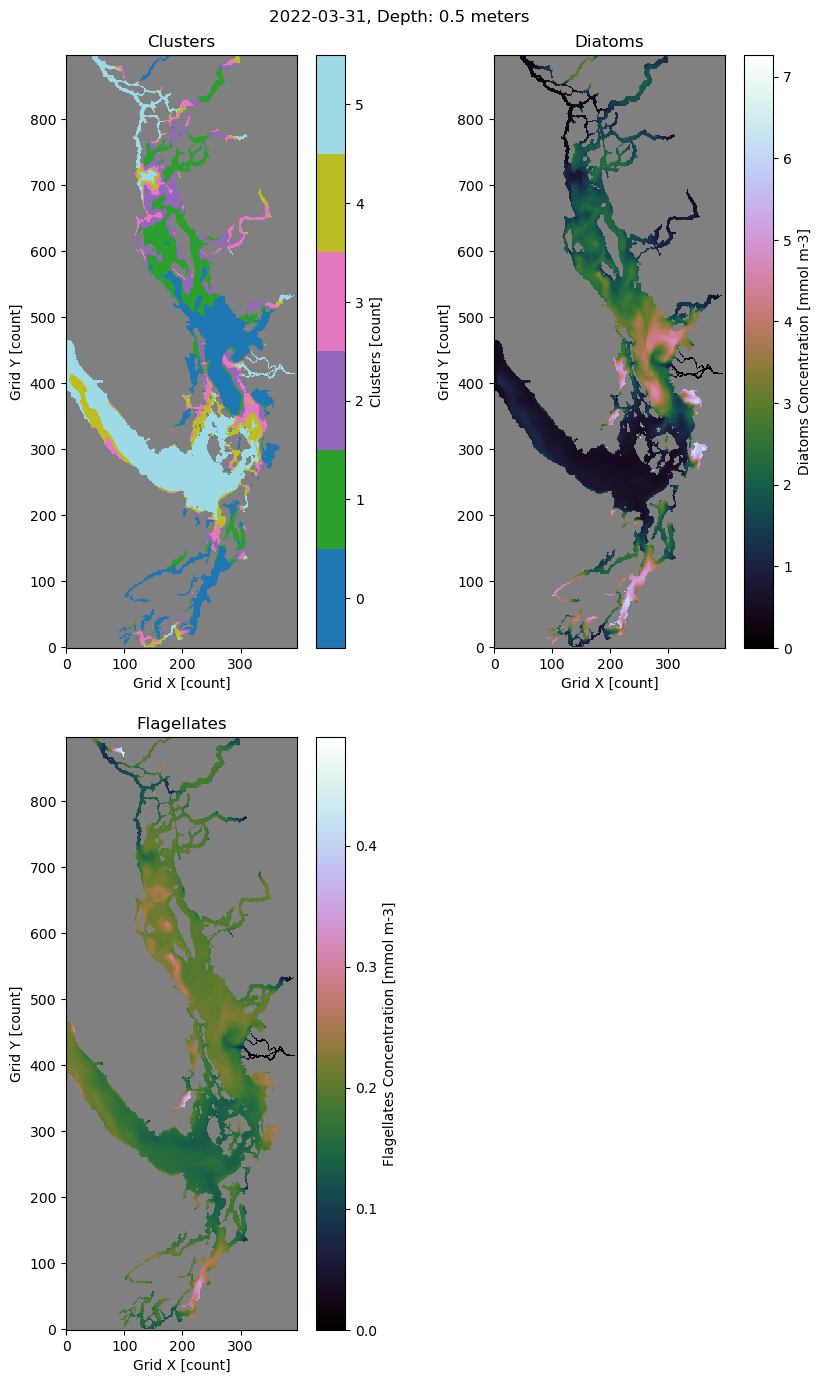

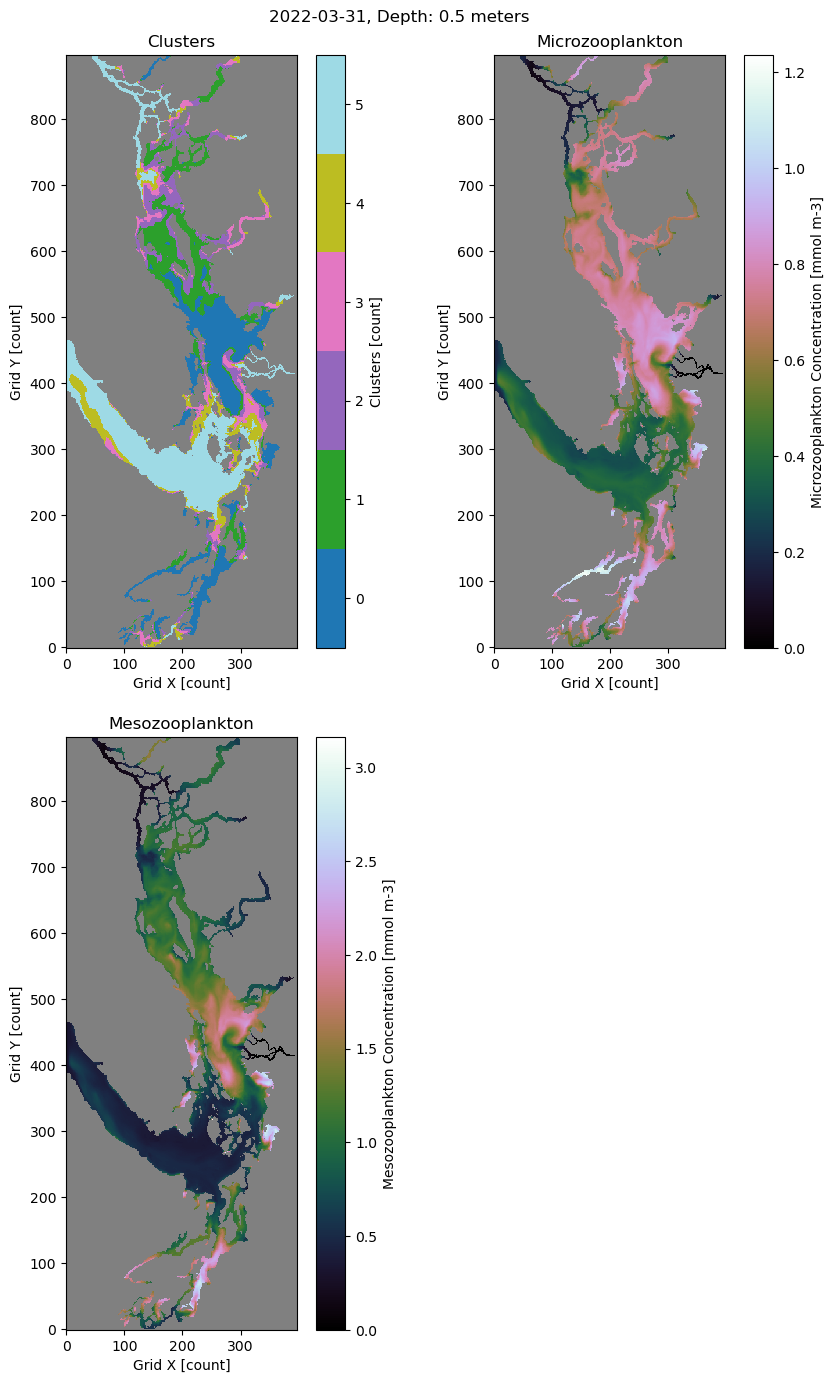

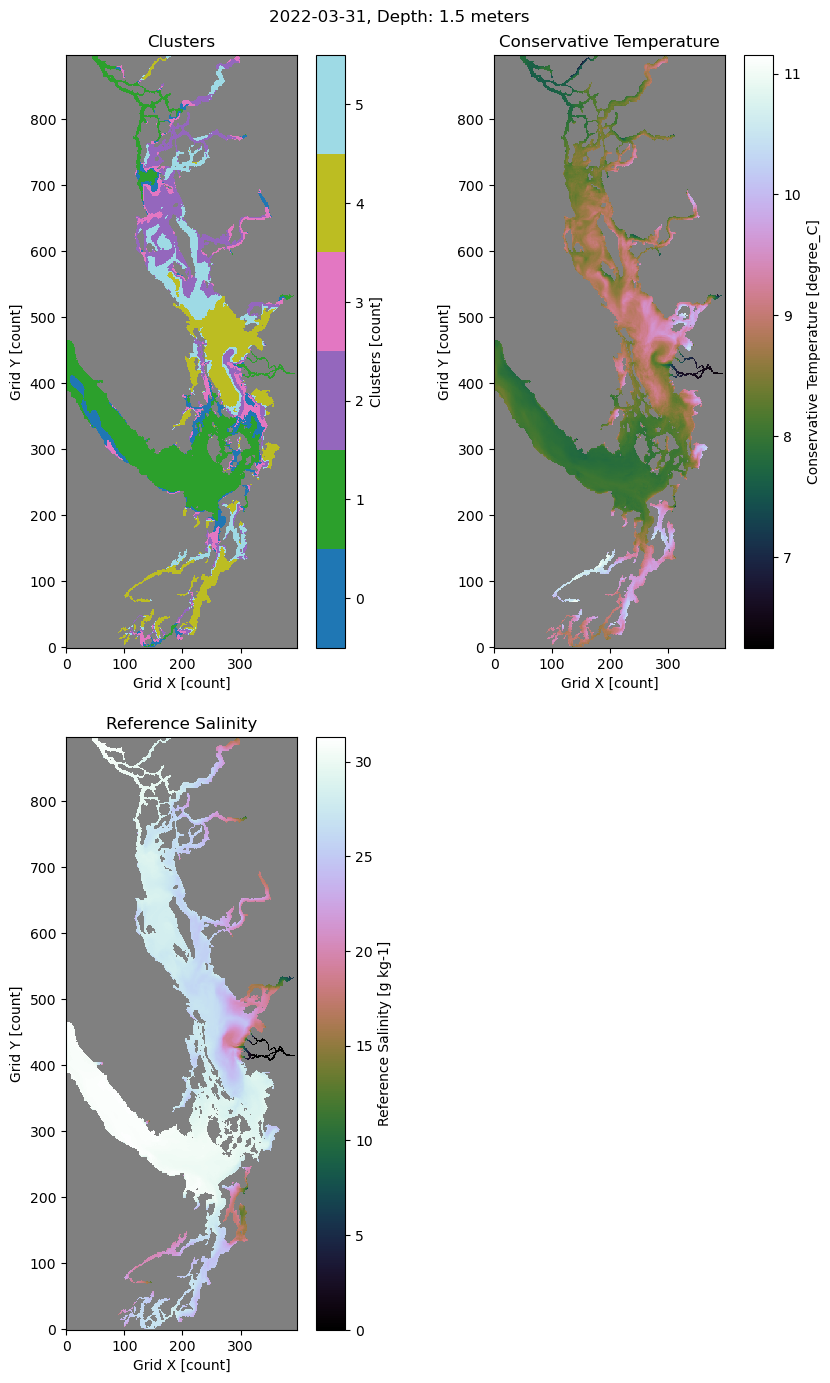

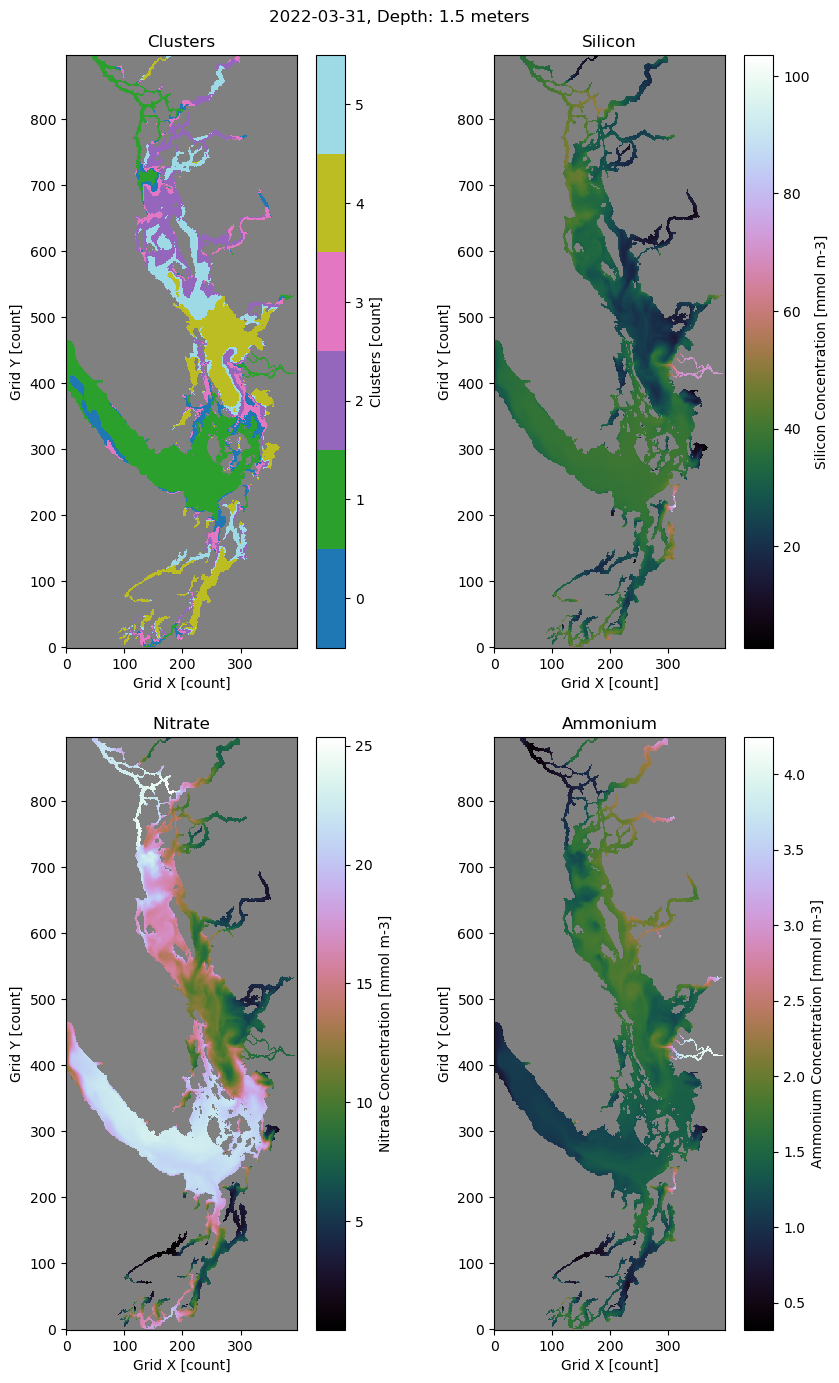

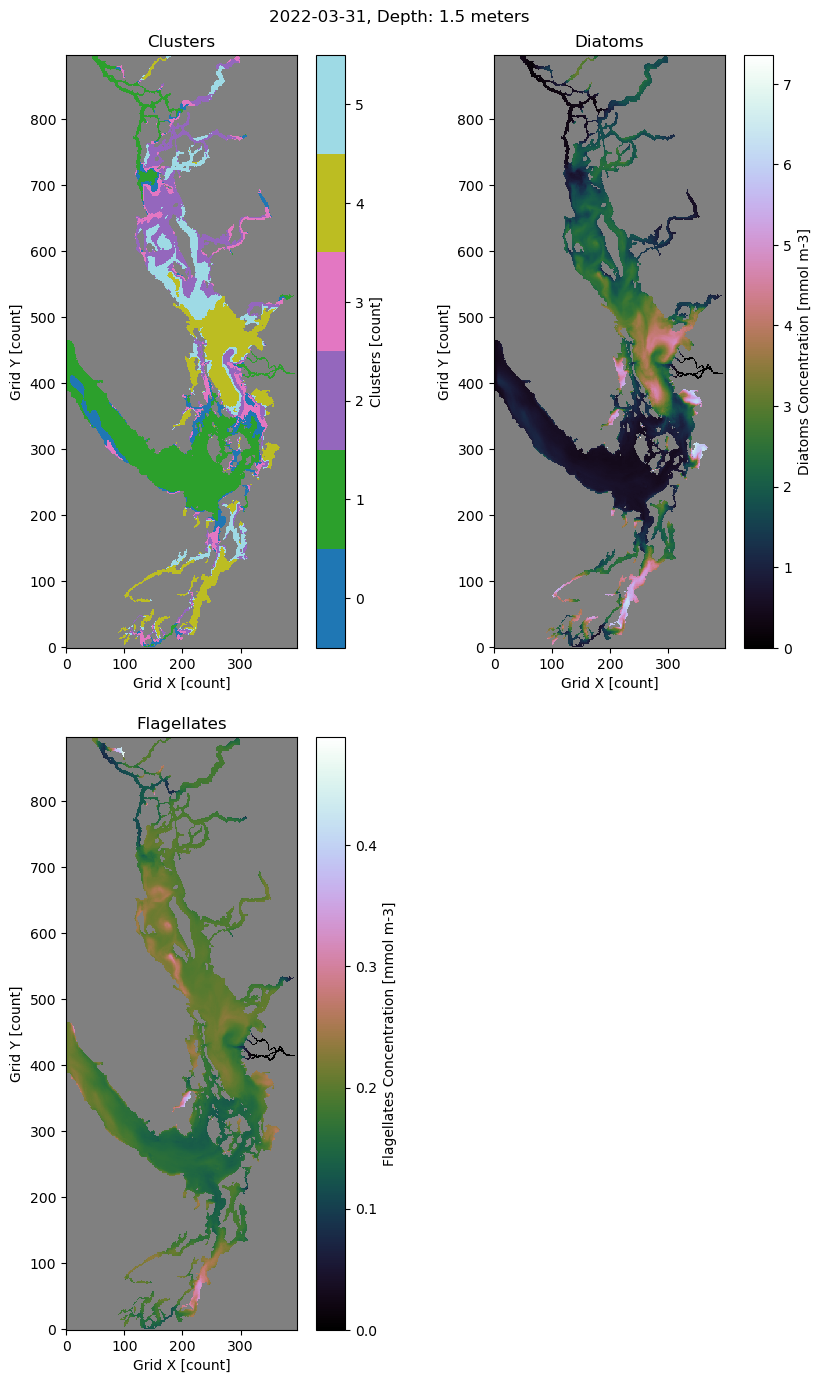

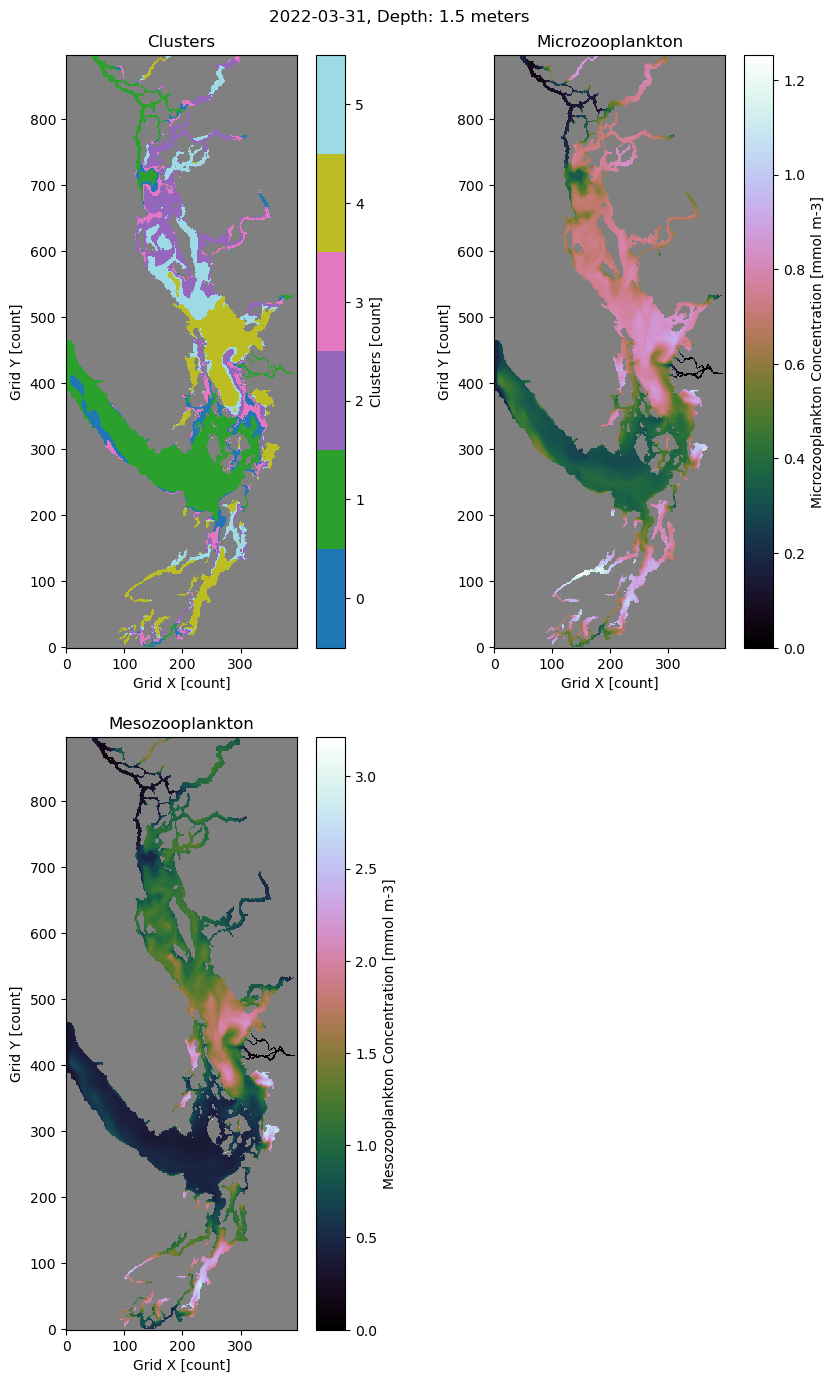

In [6]:
# Dataset and date
ds = xr.open_dataset ('/results2/SalishSea/nowcast-green.202111/31mar22/SalishSea_1d_20220331_20220331_grid_T.nc')
ds_bio = xr. open_dataset ('/results2/SalishSea/nowcast-green.202111/31mar22/SalishSea_1d_20220331_20220331_biol_T.nc')
date = pd.DatetimeIndex(ds['time_counter'].values)

# Open the mesh mask
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
mask = mesh.tmask.to_numpy()

temp, saline, sil, nitr, ammo, diat, flag, micro, meso = datasets_preparation()


for depth in range (0, 2):

    # Potential input variables
    drivers = np.stack([np.ravel(temp[0,depth]), np.ravel(saline[0,depth])])
    nutrients = np.stack([np.ravel(sil[0,depth]), np.ravel(nitr[0,depth]), np.ravel(ammo[0,depth])])
    phyto = np.stack([np.ravel(diat[0,depth]), np.ravel(flag[0,depth])])
    zoo = np.stack([np.ravel(micro[0,depth]), np.ravel(meso[0,depth])])

    # Dimensions of the map
    m = 3
    n = 2

    clusters, unique, counts = som(zoo, m, n)

    # printing()

    # Drivers
    labels = ['Clusters [count]', 'Conservative Temperature [degree_C]',
                'Reference Salinity [g kg-1]']
    titles = ['Clusters', 'Conservative Temperature',
                'Reference Salinity']
    variables = [clusters, temp[0,depth], saline[0,depth]]
    plotting (labels, titles, variables)

    # Nutrients
    labels = ['Clusters [count]', 'Silicon Concentration [mmol m-3]',
                'Nitrate Concentration [mmol m-3]', 'Ammonium Concentration [mmol m-3]']
    titles = ['Clusters', 'Silicon', 'Nitrate', 'Ammonium']
    variables = [clusters, sil[0,depth], nitr[0,depth], ammo[0,depth]]
    plotting (labels, titles, variables)

    # Phytoplankton
    labels = ['Clusters [count]', 'Diatoms Concentration [mmol m-3]',
                'Flagellates Concentration [mmol m-3]']
    titles = ['Clusters', 'Diatoms', 'Flagellates']
    variables = [clusters, diat[0,depth], flag[0,depth]]
    plotting (labels, titles, variables)

    # Zooplankton
    labels = ['Clusters [count]', 'Microzooplankton Concentration [mmol m-3]',
                'Mesozooplankton Concentration [mmol m-3]']
    titles = ['Clusters', 'Microzooplankton', 'Mesozooplankton']
    variables = [clusters, micro[0,depth], meso[0,depth]]
    plotting (labels, titles, variables)
